In [2]:
!unzip cats_2.zip
!unzip dogs_2.zip
!unzip panda_2.zip
!unzip combined_images.zip

Archive:  cats_2.zip
   creating: cats_2/
  inflating: cats_2/cats_00007.jpg   
  inflating: __MACOSX/cats_2/._cats_00007.jpg  
  inflating: cats_2/cats_00013.jpg   
  inflating: __MACOSX/cats_2/._cats_00013.jpg  
  inflating: cats_2/cats_00012.jpg   
  inflating: __MACOSX/cats_2/._cats_00012.jpg  
  inflating: cats_2/cats_00006.jpg   
  inflating: __MACOSX/cats_2/._cats_00006.jpg  
  inflating: cats_2/cats_00010.jpg   
  inflating: __MACOSX/cats_2/._cats_00010.jpg  
  inflating: cats_2/cats_00004.jpg   
  inflating: __MACOSX/cats_2/._cats_00004.jpg  
  inflating: cats_2/cats_00005.jpg   
  inflating: __MACOSX/cats_2/._cats_00005.jpg  
  inflating: cats_2/cats_00011.jpg   
  inflating: __MACOSX/cats_2/._cats_00011.jpg  
  inflating: cats_2/cats_00015.jpg   
  inflating: __MACOSX/cats_2/._cats_00015.jpg  
  inflating: cats_2/cats_00001.jpg   
  inflating: __MACOSX/cats_2/._cats_00001.jpg  
  inflating: cats_2/cats_00014.jpg   
  inflating: __MACOSX/cats_2/._cats_00014.jpg  
  inflating:

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os

vgg16 = models.vgg16(pretrained=True)
vgg16.eval()
#vgg16_sl = torch.nn.Sequential(*list(vgg16.features.children())[:1])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


list_x = []
list_y_prob = []
for filename in os.listdir('combined_images'):
  image_path = os.path.join('combined_images', filename)
  image = Image.open(image_path)
  image = transform(image)
  image = image.unsqueeze(0)
  with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_combined = vgg16.features(image)

  outputs = nn.functional.softmax(outputs, dim=1)[0]
  predicted_prob_tot, predicted_class_idx = torch.max(outputs, 0)
  predicted_cat = outputs[282]
  predicted_dog = outputs[235]
  predicted_panda = outputs[388]
  list_y_prob.append((predicted_cat.item()+predicted_dog.item()+predicted_panda.item())/3)
  list_x.append(predicted_prob_tot.item())








/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 113MB/s]


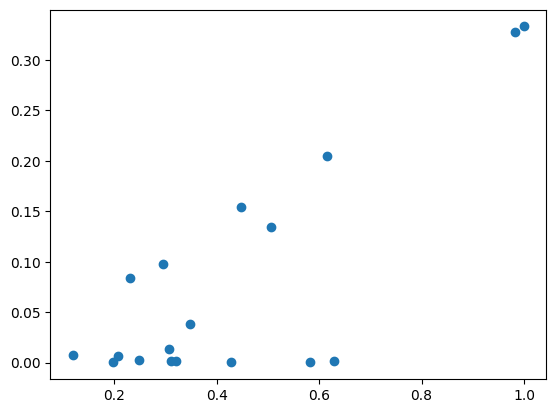

In [4]:
import matplotlib.pyplot as plt
plt.scatter(list_x,list_y_prob)
plt.show()

In [ ]:

list_eigen_tot = []
list_eigen_tot_cat = []
list_eigen_tot_dog = []
list_eigen_tot_panda = []
for filename in os.listdir('combined_images'):
  image_path = os.path.join('combined_images', filename)
  image = Image.open(image_path)
  image = transform(image)
  image = image.unsqueeze(0)
  with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_combined = vgg16.features(image)

  eigen_tot = np.linalg.norm(outputs_features_combined)
  list_eigen_tot.append(eigen_tot)
print(list_eigen_tot)
for filename in os.listdir('cats_2'):
  image_path = os.path.join('cats_2', filename)
  image = Image.open(image_path)
  image = transform(image)
  image = image.unsqueeze(0)
  with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_cats = vgg16.features(image)

  eigen_cat = np.linalg.norm(outputs_features_cats)
  list_eigen_tot_cat.append(eigen_cat)
print(list_eigen_tot_cat)
for filename in os.listdir('dogs_2'):
  image_path = os.path.join('dogs_2', filename)
  image = Image.open(image_path)
  image = transform(image)
  image = image.unsqueeze(0)
  with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_dogs = vgg16.features(image)

  eigen_dog = np.linalg.norm(outputs_features_dogs)
  list_eigen_tot_dog.append(eigen_dog)
print(list_eigen_tot_dog)
for filename in os.listdir('panda_2'):
  image_path = os.path.join('panda_2', filename)
  image = Image.open(image_path)
  image = transform(image)
  image = image.unsqueeze(0)
  with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_panda = vgg16.features(image)

  eigen_panda = np.linalg.norm(outputs_features_panda)
  list_eigen_tot_panda.append(eigen_panda)
print(list_eigen_tot_panda)




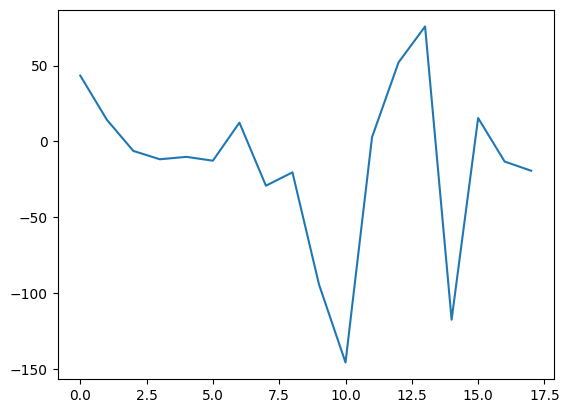

In [17]:
tot_prob = [sum(x) for x in zip(list_eigen_tot_cat, list_eigen_tot_dog, list_eigen_tot_panda)]
by3_prob = [x / 3 for x in tot_prob]
by3_prob = [by3_prob[i]-list_eigen_tot[i] for i in range(len(by3_prob))]

plt.plot(by3_prob)
plt.show()

In [28]:
image_path = 'cats_1.jpg'
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)


with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_cats = vgg16.features(image)

outputs = nn.functional.softmax(outputs, dim=1)[0]
predicted_prob_cat, predicted_class_idx = torch.max(outputs, 0)


image_path = 'dogs_1.jpg'
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)


with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_dogs = vgg16.features(image)

outputs = nn.functional.softmax(outputs, dim=1)[0]
predicted_prob_dog, predicted_class_idx = torch.max(outputs, 0)

image_path = 'panda_1.jpg'
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)


with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_panda = vgg16.features(image)

outputs = nn.functional.softmax(outputs, dim=1)[0]
predicted_prob_panda, predicted_class_idx = torch.max(outputs, 0)




image_path = 'combined_image_1.jpg'
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)


with torch.no_grad():
    outputs = vgg16(image)
    outputs_features_combined = vgg16.features(image)

outputs = nn.functional.softmax(outputs, dim=1)[0]
predicted_prob_tot, predicted_class_idx = torch.max(outputs, 0)
predicted_cat = outputs[282]
predicted_dog = outputs[235]
predicted_panda = outputs[388]
eigen_panda = np.linalg.norm(outputs_features_panda)
eigen_dog = np.linalg.norm(outputs_features_dogs)
eigen_cat = np.linalg.norm(outputs_features_cats)
eigen_tot = np.linalg.norm(outputs_features_combined)

x =(eigen_panda+eigen_dog+eigen_cat)/3
print(eigen_tot-x)


-50.26996358235675
